In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import regex as re
from nltk.corpus import stopwords
from keras.models import model_from_json
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax, Dropout
import matplotlib.pyplot as plt

In [15]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]',' ',text)
    text = re.sub("\d+", " ", text)
    stop = stopwords.words('english')
    text = " ".join(text for text in text.split() if text not in stop)
    return text

In [16]:
movie = pd.read_csv('E:\Crawl_Web\Rotten Tomatoes\Crawl Data\Crawl Info film\Movie\movie_info.csv')

In [17]:
movie = movie[['Genre', 'Synopsis']].dropna().reset_index(drop=True)[:10000]

In [18]:
# Tiền xử lí dữ liệu text
for i in range(len(movie)):
    movie['Synopsis'].iloc[i] = preprocess(movie['Synopsis'].iloc[i])

In [19]:
list_genre = []
for g in movie['Genre']:
    try:
        g = g.split(', ')
        for sub_g in g:
            if sub_g not in list_genre:
                list_genre.append(sub_g)
    except:
        continue

In [20]:
for g in list_genre:
    movie[g] = 0

for i in range(len(movie)):
    genre = movie['Genre'].iloc[i]
    for g in list_genre:
        if g in genre:
            movie[g].iloc[i] = 1

C:\Users\Nguyen Quang Tu\AppData\Local\Temp\ipykernel_13712\2218344769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[g].iloc[i] = 1


# Xây mô hình

In [21]:
def eval_plot(history):
    plt.subplot(221)
    plt.title("Accuracy")
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.legend()
    plt.subplot(222)
    plt.title("Loss")
    plt.plot(history.history['loss'], label='loss')
    plt.legend()
    plt.subplot(223)
    plt.title("Accuracy")
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.subplot(224)
    plt.title("Loss")
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

Predict Drama
Epoch 1/10
250/250 [==============================] - 17s 65ms/step - loss: 0.8112 - accuracy: 0.5635 - val_loss: 0.6038 - val_accuracy: 0.6835
Epoch 2/10
250/250 [==============================] - 17s 68ms/step - loss: 0.3596 - accuracy: 0.8633 - val_loss: 0.7395 - val_accuracy: 0.6570
Epoch 3/10
250/250 [==============================] - 16s 66ms/step - loss: 0.0955 - accuracy: 0.9736 - val_loss: 1.4613 - val_accuracy: 0.6480
Epoch 4/10
250/250 [==============================] - 18s 72ms/step - loss: 0.0207 - accuracy: 0.9958 - val_loss: 1.7052 - val_accuracy: 0.6445


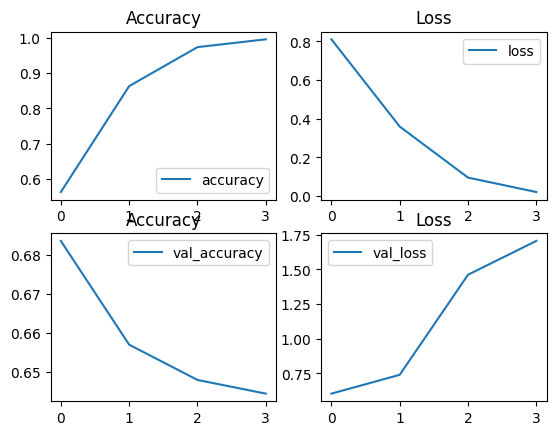

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Predict Comedy
Epoch 1/10
250/250 [==============================] - 18s 67ms/step - loss: 0.6714 - accuracy: 0.7182 - val_loss: 0.5134 - val_accuracy: 0.7540
Epoch 2/10
250/250 [==============================] - 17s 70ms/step - loss: 0.2591 - accuracy: 0.9093 - val_loss: 0.6633 - val_accuracy: 0.7420
Epoch 3/10
250/250 [==============================] - 17s 68ms/step - loss: 0.0728 - accuracy: 0.9810 - val_loss: 0.9244 - val_accuracy: 0.7400
Epoch 4/10
250/250 [==============================] - 17s 67ms/step - loss: 0.0180 - accuracy: 0.9962 - val_loss: 1.2879 - val_accuracy: 0.7345
Epoch 5/10
250/250 [==============================] - 17s 66ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 1.5824 - val_accuracy: 0.7230


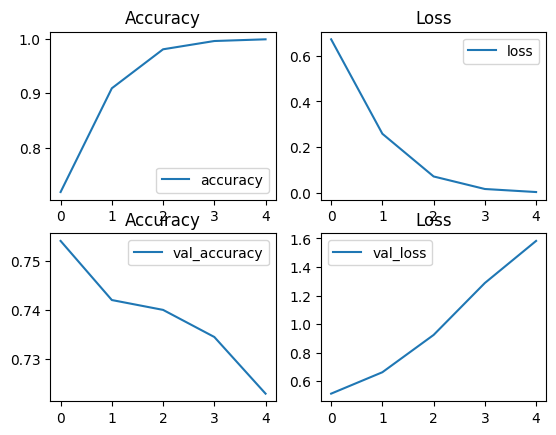

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Predict Adventure
Epoch 1/10
250/250 [==============================] - 18s 69ms/step - loss: 0.2971 - accuracy: 0.9346 - val_loss: 0.1846 - val_accuracy: 0.9465
Epoch 2/10
250/250 [==============================] - 17s 68ms/step - loss: 0.1068 - accuracy: 0.9613 - val_loss: 0.2143 - val_accuracy: 0.9345
Epoch 3/10
250/250 [==============================] - 18s 72ms/step - loss: 0.0251 - accuracy: 0.9926 - val_loss: 0.2905 - val_accuracy: 0.9345


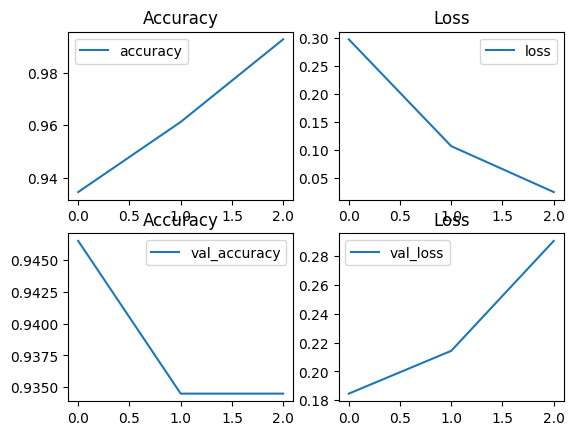

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [22]:
for genre in list_genre[:3]:
    print('Predict ' + genre)
    # Chia bộ train và test (80:20)
    x_train, x_test, y_train, y_test = train_test_split(movie['Synopsis'].values, movie[genre].values, test_size = 0.2, random_state = 0)

    # Vectorizer
    vectorizer = TfidfVectorizer()
    features = vectorizer.fit_transform(x_train)
    features_test = vectorizer.transform(x_test) # Bộ valid

    # Neural Network model
    model = Sequential()
    model.add(Dense(256, input_shape = (features.shape[1],), activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'sigmoid'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(19))
    model.add(Softmax())

    model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.2, patience=2, restore_best_weights=True)

    history = model.fit(features.todense(), y_train, validation_data = (features_test.todense(), y_test), epochs = 10, callbacks=[callback])

    # Đánh giá mô hình
    eval_plot(history)

    # Lưu mô hình
    # model_json = model.to_json()

    # with open("predict_genre_%s.json" %genre, "w") as json_file:
    #     json_file.write(model_json)

    # model.save_weights("predict_genre_%s.h5" %genre)

    print('-'*100)
    print('-'*100)

In [23]:
len(list_genre)

30

# Load Model

In [ ]:
json_file = open('predict_genre_Drama.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("predict_genre_Drama.h5")

In [ ]:
t = """17-year-old Suzume's journey begins in a quiet town in Kyushu when she encounters a young man who tells her, "I'm looking for a door." What Suzume finds is a single weathered door standing upright in the midst of ruins as though it was shielded from whatever catastrophe struck. Seemingly drawn by its power, Suzume reaches for the knob.... Doors begin to open one after another all across Japan, unleashing destruction upon any who are near. Suzume must close these portals to prevent further disaster. The stars. The sunset. The morning sky. Within that realm, it was as though all time had melted together in the sky--guided by these mysterious doors, Suzume's journey to close doors is about to begin."""

t = vectorizer.transform([preprocess(t)])
np.argmax(loaded_model.predict(t.todense()),axis=1)

1/1 [==============================] - 0s 24ms/step


array([0], dtype=int64)